In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [28]:
# This pandas function is used to read a CSV file. The 'sep' parameter specifies that ';' is the separator instead of the default ','.
df = pd.read_csv('bank.csv', sep=';')

### Data Cleaning/Preprocessing - Understanding the data

In [29]:
# Remove duplicates if any
df = df.drop_duplicates()

In [30]:
#Making sure the first leter of all the column names starts with a capital letter
df.columns=df.columns.str.capitalize()

In [31]:
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# Displays basic information about the dataset
print("Data Overview:")
df.info()

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        4521 non-null   int64 
 1   Job        4521 non-null   object
 2   Marital    4521 non-null   object
 3   Education  4521 non-null   object
 4   Default    4521 non-null   object
 5   Balance    4521 non-null   int64 
 6   Housing    4521 non-null   object
 7   Loan       4521 non-null   object
 8   Contact    4521 non-null   object
 9   Day        4521 non-null   int64 
 10  Month      4521 non-null   object
 11  Duration   4521 non-null   int64 
 12  Campaign   4521 non-null   int64 
 13  Pdays      4521 non-null   int64 
 14  Previous   4521 non-null   int64 
 15  Poutcome   4521 non-null   object
 16  Y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Y            0
dtype: int64


The above code chunk shows that there are no missing/ null values and hence no imputation is needed.

In [7]:
# Displaying the summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               Age       Balance          Day     Duration     Campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             Pdays     Previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000 

In [8]:
# Check for negative values in numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"Warning: Negative values found in {col}")

The negative values in Pdays occur because there are -1 present which signifies that the client was never contacted previously and the negative values in balance occurs if it is an overdraft account. Hence the negative values in these cases are valid.

### Exploratory Data Analysis

This histogram displays the distribution of ages in the dataset which helps to understand the age spread and identify any skewness or outliers.

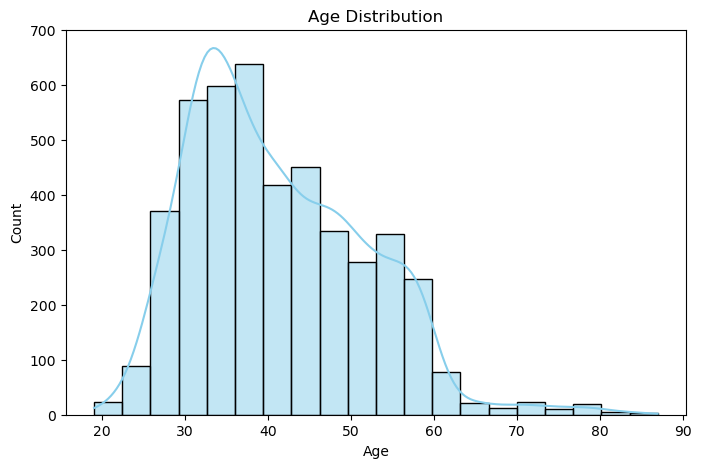

In [9]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This scatter plot shows the relationship between age and balance in the dataset. It helps in identifying any correlation or patterns between these two variables.

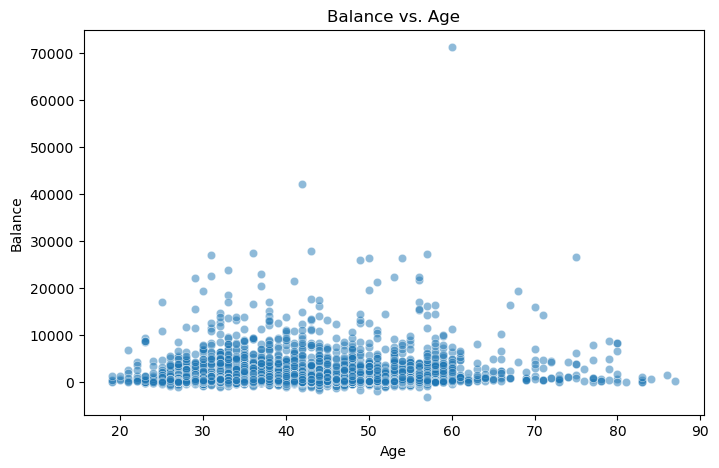

In [10]:
# 2. Balance vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Balance'], alpha=0.5)
plt.title('Balance vs. Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

This count plot visualizes the distribution of different job categories in the dataset by showing the frequency of each job type and helping to identify the most and least common occupations.

C:\Users\RAUNAKSINGH KHALSA\AppData\Local\Temp\ipykernel_23704\558649550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Job'], order=df['Job'].value_counts().index, palette="viridis")


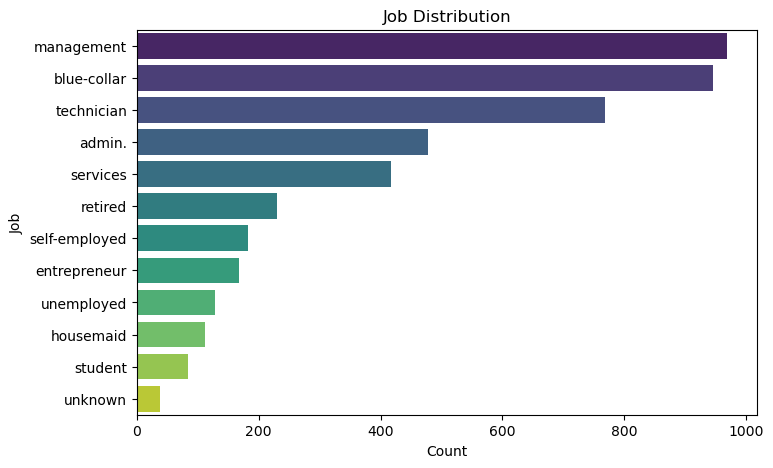

In [11]:
# 3. Job Count
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Job'], order=df['Job'].value_counts().index, palette="viridis")
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

This pie chart shows the proportion of customers who subscribed and did not subscribe and hence providing a clear visual representation of the subscription rate in the dataset.

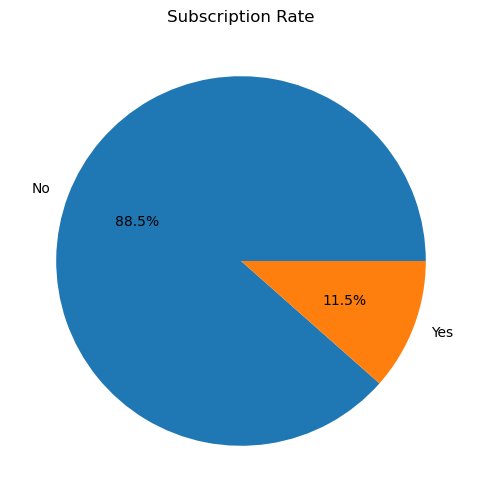

In [12]:
# 4. Subscription Rate Pie Chart
plt.figure(figsize=(6, 6))
df['Y'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Subscription Rate')
plt.ylabel('')
plt.show()

This boxplot shows the distribution of call durations for each subscription status by highlighting differences in the duration of calls between those who subscribed and those who did not.

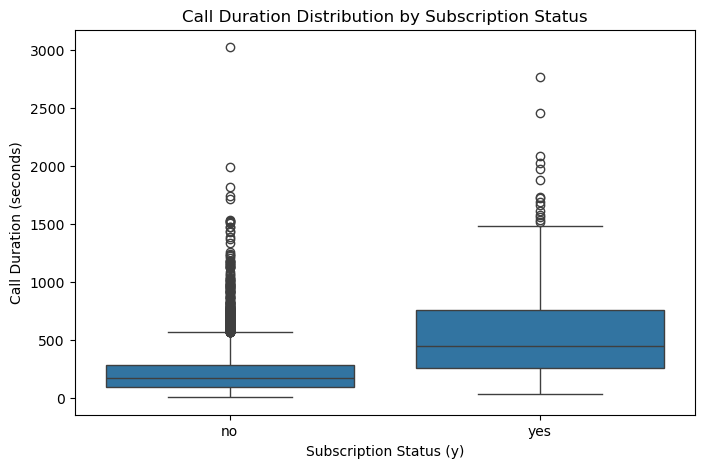

In [13]:
# 5. Boxplot of Duration by Subscription Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Y'], y=df['Duration'])
plt.title('Call Duration Distribution by Subscription Status')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Call Duration (seconds)')
plt.show()

This count plot shows how marital status influences subscription rates by displaying the number of subscriptions for each marital status category. It is done with a comparison between those who subscribed and those who did not.

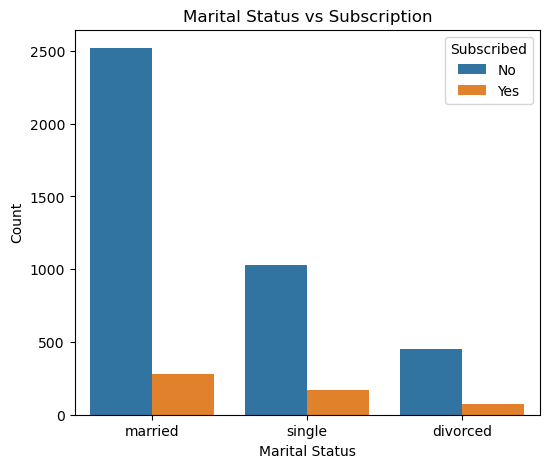

In [14]:
# 6. Shows how marital status affects subscription rates.
plt.figure(figsize=(6, 5))
sns.countplot(x='Marital', hue='Y', data=df)
plt.title('Marital Status vs Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

### Label Encoding

This below code chunk encodes categorical variables in the dataset using LabelEncoder and converting non-numeric columns into numerical values for easier analysis and modeling.

In [15]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print("Data after Cleaning and Encoding:")
df.head()

Data after Cleaning and Encoding:


,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


#### Heatmap

This heatmap visualizes the correlation matrix of the dataset. It highlights relationships between numerical variables with annotated values showing the strength and direction of the correlations.

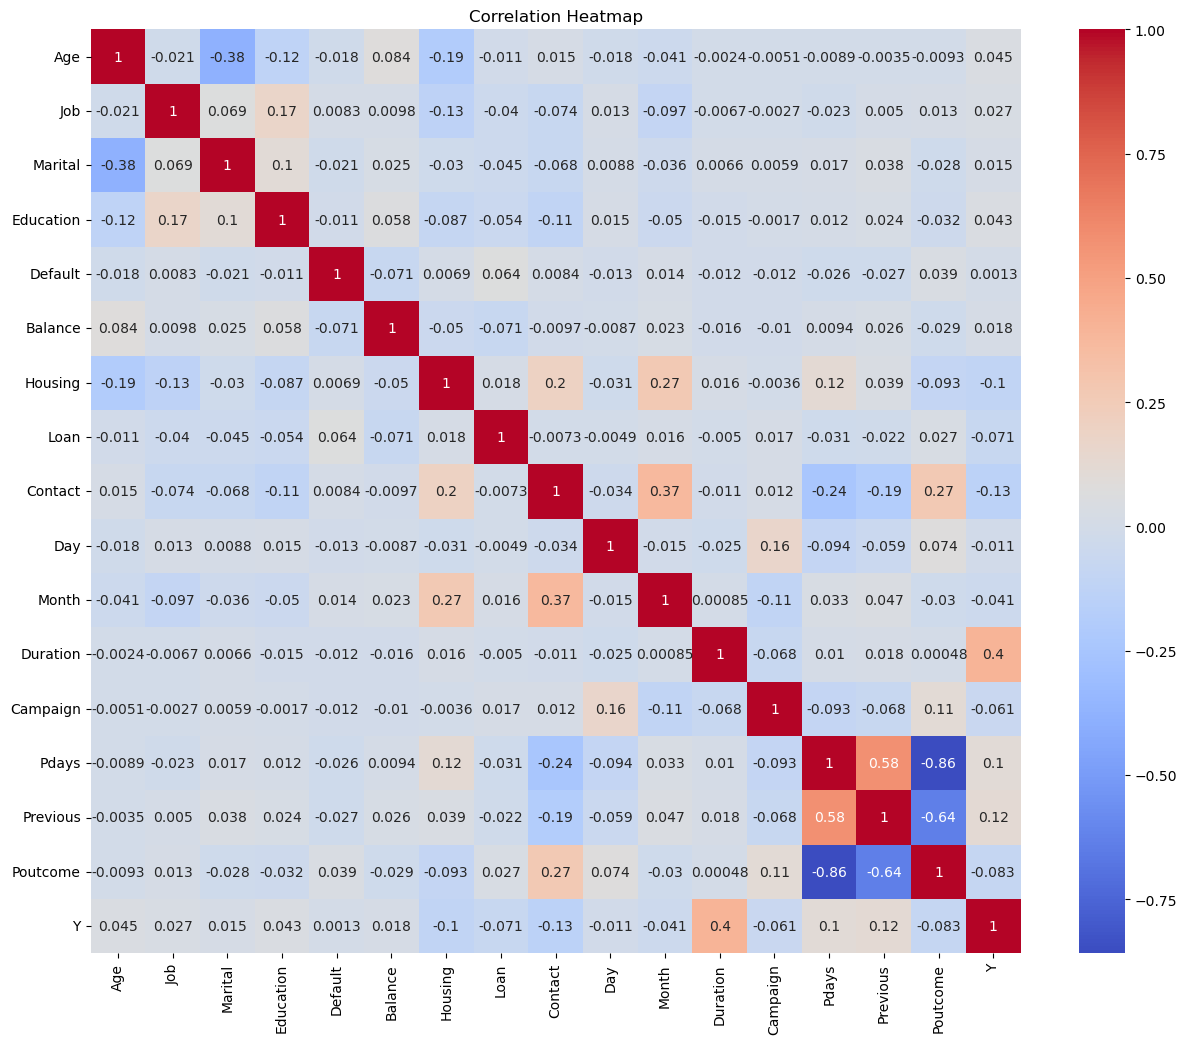

In [16]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

This code separates the features (X) from the target variable (y), dropping irrelevant columns like ‘Y’(Target variable), ‘Month’, and ‘Day’. If there are too many features, methods such as Chi-Square or ANOVA can be used to select the most relevant ones for modeling.

In [17]:
X = df.drop(['Y','Month','Day'], axis=1)
y = df['Y']
print(X.columns)

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Duration', 'Campaign', 'Pdays', 'Previous',
       'Poutcome'],
      dtype='object')


### Cross-Validation of Models

To evaluate and compare model performance more reliably, we apply **5-fold cross-validation** to each classifier. This technique splits the dataset into 5 parts, trains the model on 4 parts, and tests on the remaining part — repeating this process 5 times.

We're using the following models:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

**Note:** To ensure fair comparison and improve convergence, especially for models sensitive to feature scaling (like Logistic Regression and SVM), we use a pipeline with `StandardScaler`.

The printed output below shows the **average cross-validation accuracy** and **standard deviation** for each model.


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression CV Accuracy: 0.8901 (+/- 0.0022)
Decision Tree CV Accuracy: 0.8540 (+/- 0.0080)
Random Forest CV Accuracy: 0.8925 (+/- 0.0082)
SVM CV Accuracy: 0.8916 (+/- 0.0038)


### Train-Test Split

This code splits the data into training and testing sets with 30% allocated to the test set. It then standardizes the feature values using StandardScaler to ensure all features have a mean of 0 and a standard deviation of 1 and thereby improving model performance.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building and Evaluation

Comparing multiple models and selecting the best one based on performance metrics.

This code section implements and evaluates multiple classification models: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). Each model trains on the training data, makes predictions on the test set and calculates performance metrics including accuracy, confusion matrix, classification report, and ROC AUC score. The ROC AUC score helps assess the model’s ability to distinguish between classes where a higher value indicating better performance.

Logistic Regression is a great choice for this task of binary classification because it gives you a clear probability for each prediction making it easy to understand how the features influence the target. It’s particularly useful when the data is linearly separable and is computationally quick even with larger datasets.

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
fpr_LR, tpr_LR, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_LR = auc(fpr_LR, tpr_LR)
acc_LR = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_LR)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('ROC (area = %0.2f)' %roc_auc_LR)

Accuracy Score: 0.8909358879882093
Confusion Matrix:
 [[1175   30]
 [ 118   34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.53      0.22      0.31       152

    accuracy                           0.89      1357
   macro avg       0.72      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357

ROC (area = 0.87)


Decision Trees are really good at capturing complex, non-linear relationships between features. They’re easy to interpret and visualize which makes understanding how the model makes decisions straightforward. It is ideal for when you want transparency in your predictions.

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
fpr_DT, tpr_DT, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_DT = auc(fpr_DT, tpr_DT)
acc_DT = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_DT)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('ROC (area = %0.2f)' %roc_auc_DT)

Accuracy Score: 0.8621960206337509
Confusion Matrix:
 [[1100  105]
 [  82   70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1205
           1       0.40      0.46      0.43       152

    accuracy                           0.86      1357
   macro avg       0.67      0.69      0.67      1357
weighted avg       0.87      0.86      0.87      1357

ROC (area = 0.69)


Random Forest works well because it uses a collection of decision trees to improve prediction accuracy and reduce overfitting. It’s perfect for handling complex data and large feature sets and it gives a sense of which features are most important for making predictions.

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
fpr_RF, tpr_RF, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_RF = auc(fpr_RF, tpr_RF)
acc_RF = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_RF)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('ROC (area = %0.2f)' %roc_auc_RF)

Accuracy Score: 0.8938835666912307
Confusion Matrix:
 [[1174   31]
 [ 113   39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.56      0.26      0.35       152

    accuracy                           0.89      1357
   macro avg       0.73      0.62      0.65      1357
weighted avg       0.87      0.89      0.88      1357

ROC (area = 0.88)


SVM is a good choice for binary classification when the data has clear distinctions between the two classes. It looks for the best possible line (or hyperplane) that separates them and it’s particularly good when working with high-dimensional data or when the decision boundary isn’t necessarily a straight line.

In [22]:
from sklearn.svm import SVC
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
acc_SVM = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_SVM)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('ROC (area = %0.2f)' %roc_auc_SVM)

Accuracy Score: 0.8975681650700074
Confusion Matrix:
 [[1183   22]
 [ 117   35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.61      0.23      0.33       152

    accuracy                           0.90      1357
   macro avg       0.76      0.61      0.64      1357
weighted avg       0.88      0.90      0.88      1357

ROC (area = 0.81)


The evaluation of each model is also observed in the above code chunks. Accuracy, precision, recall, f1-score and AUC-ROC are calculated for each model. The accuracy and AUC-ROC will be discussed in the following section.

### Visualization of the metrices of the implemented models

This ROC curve compares how well our four different machine learning models, Logistic Regression, Decision Tree, Random Forest, and SVM can distinguish between classes. The closer a curve is to the top-left corner, the better the model is at making correct predictions. The Random Forest model performs the best with an Area Under the Curve of 0.88 while the Decision Tree seems to struggle the most with an AUC of 0.69.

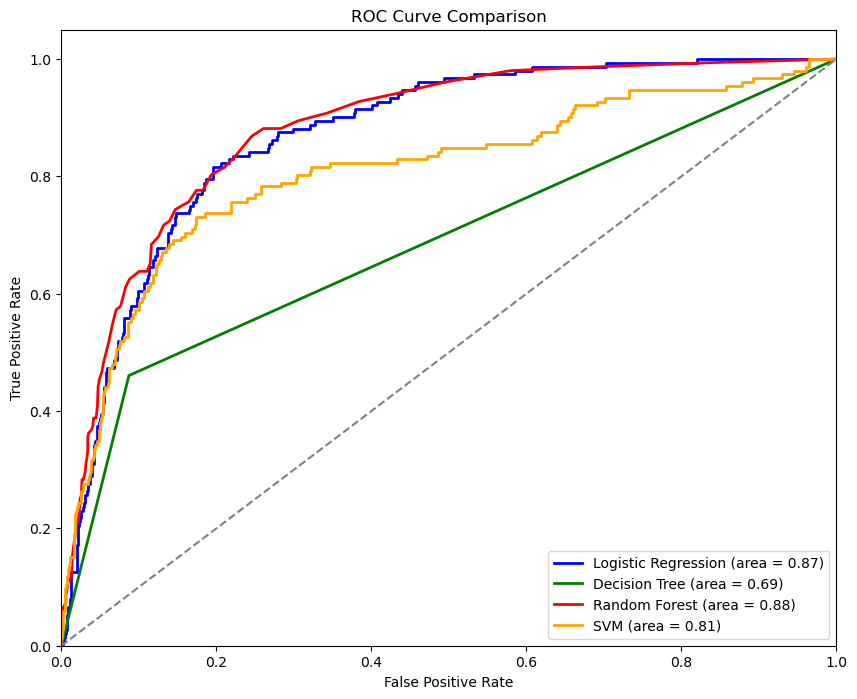

In [23]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(fpr_LR, tpr_LR, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_LR)

# Decision Tree
plt.plot(fpr_DT, tpr_DT, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_DT)

# Random Forest
plt.plot(fpr_RF, tpr_RF, color='red', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_RF)

# SVM
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, label='SVM (area = %0.2f)' % roc_auc_SVM)

# Adding details to the plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

ROC AUC is a better metric than accuracy because it evaluates how well a model differentiates between classes across different threshold settings. Meanwhile accuracy can be misleading in imbalanced datasets where a model may predict the majority class correctly without truly learning meaningful patterns.

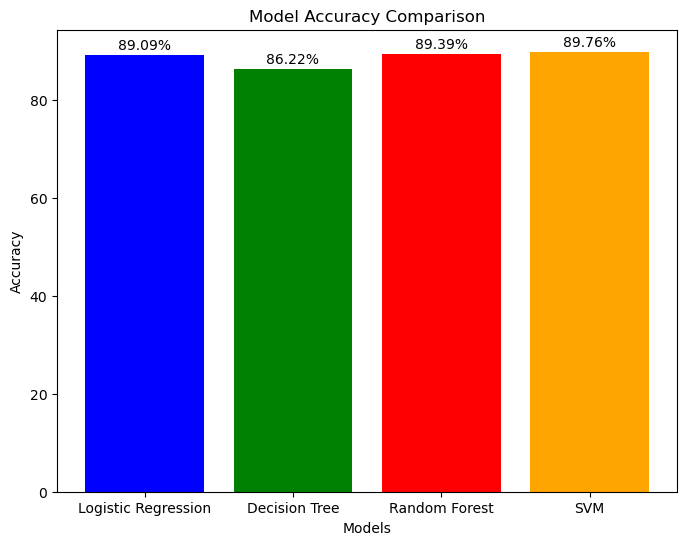

In [24]:
# Accuracy values for each model
accuracies = [acc_LR*100, acc_DT*100, acc_RF*100, acc_SVM*100]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Create a bar plot to compare the accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Adding the text labels on the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.5, f"{accuracies[i]:.2f}%", ha = 'center', va = 'bottom')

plt.show()

This bar chart compares the accuracy of the four models. The accuracy percentages show how often each model correctly classifies data. Random Forest (89.46%) and SVM (89.76%) perform the best, followed closely by Logistic Regression (89.09%), while the Decision Tree has the lowest accuracy at 86.22%.

The Random Forest model performs the best with the highest ROC AUC (0.88) and a strong accuracy (89.46%), making it the most reliable for classification. SVM and Logistic Regression also perform well with similar accuracy (around 89%) but slightly lower AUC scores, meaning they might be good alternatives. The Decision Tree performs the worst with the lowest AUC (0.69) and accuracy (86.22%), indicating it struggles with distinguishing between classes.